In [18]:
import scipy as sp
import seaborn as sns #통계
from bs4 import BeautifulSoup

import statsmodels as sm
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pylab as plt

import matplotlib.pyplot as pls
import seaborn as sns #분포 시각화
import requests
import re
pd.options.display.max_rows=999
pd.options.display.max_columns=999
%matplotlib inline rc('font', family='AppleGothic') plt.rcParams['axes.unicode_minus'] = False
import missingno as msno
from sklearn.impute import SimpleImputer
from patsy import *
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures



from konlpy.tag import Okt

UsageError: unrecognized arguments: rc('font', family='AppleGothic') plt.rcParams['axes.unicode_minus'] = False


In [ ]:
로지스틱 - 로지스틱 회귀분석 모형으로 종속변수가 이항분포를 따르고 그 모수가 u가 독립변수에 의존

In [ ]:
𝑝(𝑦∣𝑥)=Bin(𝑦;𝜇(𝑥),𝑁)
로지스틱 함수는 y값이 특정한 구간내의 값만 가지거나 이항분포 형태로 가진다면 로지스틱 사용 가능

In [ ]:
로지스틱 함수는 음의 무한태부너 양의 무한대까지 실수값을 0~1 사이 1대1로 대응시키는 시그모이드 함수
승산비-베르누이 시도에서 1이 나올확률과 아닌 확률의 비를 승산비라고 함  odds rate
이것을 로그화 한것을 로지트 함수라고 함 이것을 역으로 톨리면 로지스틱스 함수


하이퍼 볼릭 탄젠트 함수는 로지스틱 함수를 위아래로 2배 늘리고 좌우로 절반 줄임

In [2]:
선형 판별함수

로지스틱 함수를 사용하면 z값과 u값의 관계는 z=0 u=0.5면 u보다크면 1로 예측 아니면 0
판별 함수의 수식은 z=w.Tx

In [ ]:
로지스틱 회귀분석 모형의 모수 추정
로지스틱 회귀분석의 모수는 최대가능도 방법으로(MLE) 추정가능
로그 가능도 함수를  LL  최대화 하는것이 목적 함수를 최소화 하는 것과 같다 최대경사도 사용


In [ ]:
로지스틱 회귀 성능 측정

로지스틱 회귀 성능은 맥파든 의사결정계수로 회귀 성능 측정 여기서 이탈도의 값이 커지면 성능이 나쁨
이탈도가 크면 의사결정계수가 0이되고 작으면 의사결정계수가 1이된다

In [10]:
#로그 손실함수
from sklearn.metrics import log_loss

y_hat = logit_res.predict(X)
log_loss(y, y_hat, normalize=False)


mu_null = np.sum(y) / len(y)
mu_null

y_null = np.ones_like(y) * mu_null
log_loss(y, y_null, normalize=False)

1 - (log_loss(y, y_hat) / log_loss(y, y_null))

NameError: name 'logit_res' is not defined

In [6]:
로지스틱 회귀를 사용한 이진 분류의 예¶
다음 데이터는 미국 의대생의 입학관련 데이터이다. 데이터의 의미는 다음과 같다.

(768, 1024)

In [22]:
data_med = sm.datasets.get_rdataset("MedGPA", package="Stat2Data")
df_med = data_med.data
df_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


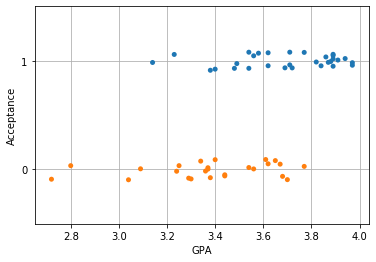

In [23]:
sns.stripplot(x="GPA", y="Acceptance", data=df_med,
              jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

In [24]:
model_med = sm.Logit.from_formula("Acceptance ~ Sex + BCPM + GPA + VR + PS + WS + BS + Apps", df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Tue, 21 Jul 2020   Pseudo R-squ.:                  0.5913
Time:                        18:51:38   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 6.014e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.

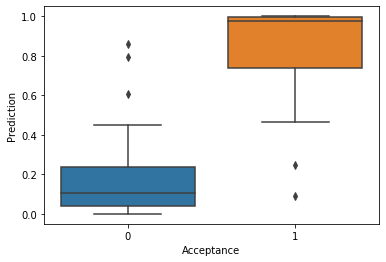

In [25]:
df_med["Prediction"] = result_med.predict(df_med)
sns.boxplot(x="Acceptance", y="Prediction", data=df_med)
plt.show()


In [26]:
model_med = sm.Logit.from_formula("Acceptance ~ PS + BS", df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.460609
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   55
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                            2
Date:                Tue, 21 Jul 2020   Pseudo R-squ.:                  0.3315
Time:                        18:52:26   Log-Likelihood:                -25.333
converged:                       True   LL-Null:                       -37.896
Covariance Type:            nonrobust   LLR p-value:                 3.503e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.5427      4.684     -3.318      0.001     -24.723      -6.362
PS             0.4798      0.

In [ ]:
위 결과를 바탕으로 다음 점수가  15.5427+0.5 보다 크면 합격이라고 예측할 수 있다.